
# Proyecto de Análisis de Videojuegos
Este proyecto corresponde al análisis de un conjunto de datos de videojuegos para la tienda en línea Ice. El objetivo es identificar patrones que determinen si un juego tiene éxito o no, y analizar las plataformas, géneros y reseñas que afectan a las ventas. Los resultados permitirán detectar proyectos prometedores y planificar campañas publicitarias.

## Descripción de datos
El dataset contiene información sobre los videojuegos, como:
- **Name**: Nombre del juego.
- **Platform**: Plataforma en la que se lanzó el juego (por ejemplo, Xbox o PlayStation).
- **Year_of_Release**: Año de lanzamiento.
- **Genre**: Género del juego.
- **NA_sales**: Ventas en Norteamérica (millones de dólares estadounidenses).
- **EU_sales**: Ventas en Europa (millones de dólares).
- **JP_sales**: Ventas en Japón (millones de dólares).
- **Other_sales**: Ventas en otras regiones (millones de dólares).
- **Critic_Score**: Puntuación de los críticos (escala de 0 a 100).
- **User_Score**: Puntuación de los usuarios (escala de 0 a 10).
- **Rating**: Clasificación ESRB (por ejemplo, E para todos, T para adolescentes).

### Paso 1: Cargar y visualizar los datos


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer el archivo CSV
df = pd.read_csv('games.csv',sep=',')

# Mostrar las primeras filas del DataFrame
df.head()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



### Paso 2: Preparación de datos
En este paso se llevan a cabo las siguientes tareas:
- Normalizar los nombres de las columnas a minúsculas.
- Convertir `year_of_release` y `user_score` a los tipos de datos apropiados.
- Crear una nueva columna `total_sales` que representa las ventas totales en todas las regiones.


In [2]:

# Normalizar los nombres de las columnas a minúsculas
df.columns = df.columns.str.lower()

# Reemplazar 'tbd' en 'user_score' con NaN y convertir a float
df['user_score'].replace('tbd', np.nan, inplace=True)
df['user_score'] = df['user_score'].astype('float')

# Convertir 'year_of_release' a int y manejar valores nulos
df['year_of_release'] = df['year_of_release'].fillna(0).astype('int')
df['year_of_release'].replace(0, np.nan, inplace=True)

# Crear la columna 'total_sales'
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Mostrar información general del DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


C:\Users\mm131\AppData\Local\Temp\ipykernel_9864\4001695979.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['user_score'].replace('tbd', np.nan, inplace=True)
C:\Users\mm131\AppData\Local\Temp\ipykernel_9864\4001695979.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For


### Paso 3: Análisis de datos
En este paso se examina la cantidad de juegos lanzados por año y se analiza la evolución de las ventas por plataforma. Se visualizan los resultados para detectar tendencias y patrones.


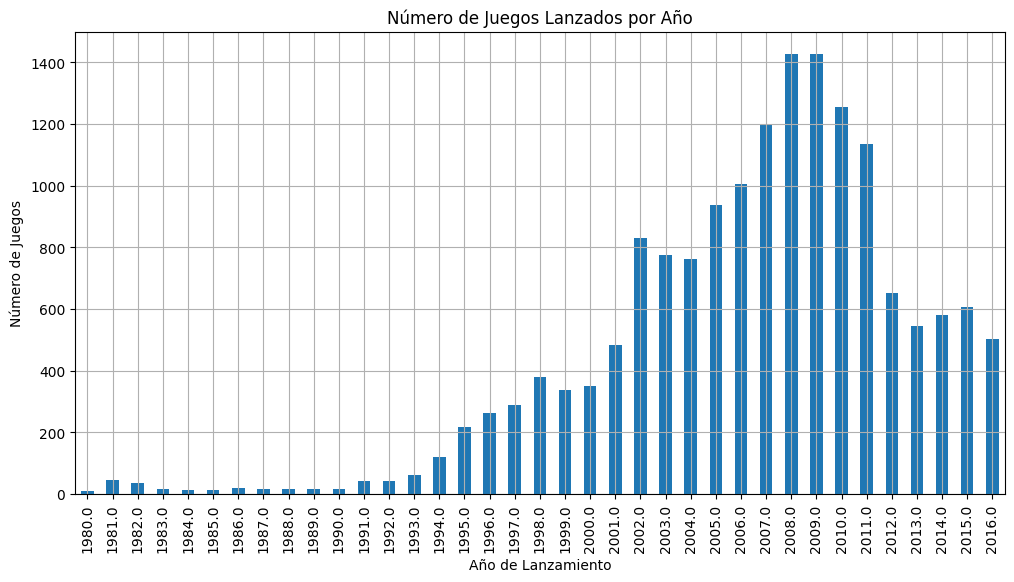

In [3]:

# Contar el número de juegos lanzados por año
games_per_year = df['year_of_release'].value_counts().sort_index()

# Mostrar la evolución de los lanzamientos
games_per_year.plot(kind='bar', figsize=(12, 6))
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.grid(True)
plt.show()


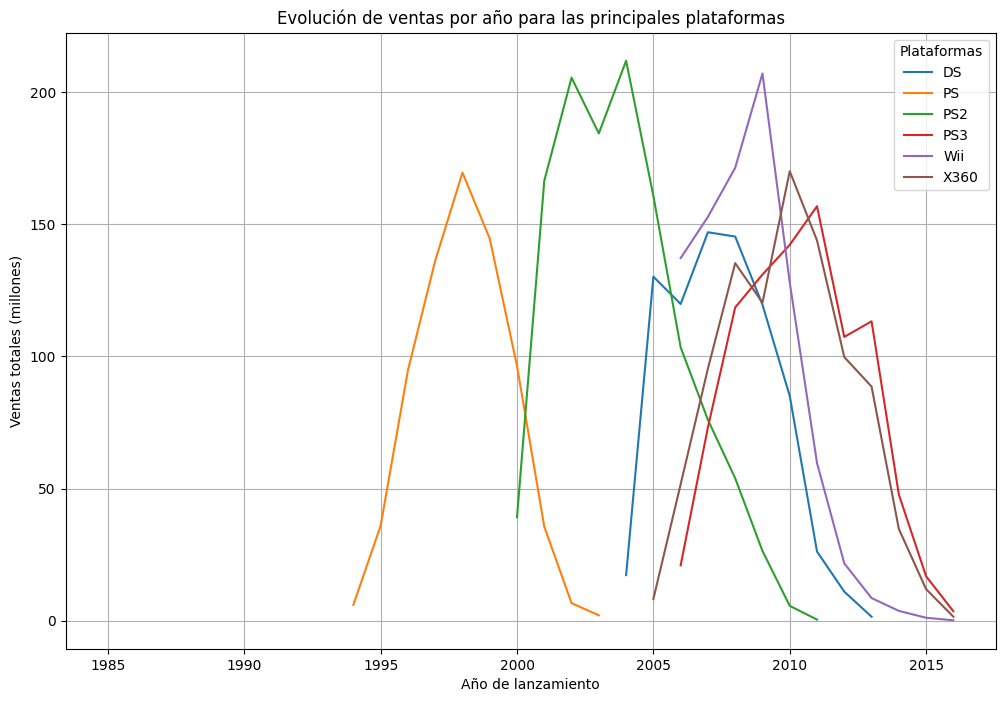

In [4]:

# Calcular las ventas totales por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Seleccionar las principales plataformas para el análisis (top 6 plataformas)
top_platforms = platform_sales.index[:6]
platform_data = df[df['platform'].isin(top_platforms)]

# Calcular las ventas totales por año para las principales plataformas
platform_sales_year = platform_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Graficar la evolución de ventas por año para las principales plataformas
platform_sales_year.plot(figsize=(12, 8))
plt.title("Evolución de ventas por año para las principales plataformas")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas totales (millones)")
plt.legend(title='Plataformas')
plt.grid(True)
plt.show()



### Paso 4: Análisis de la correlación entre reseñas y ventas
Se analiza la correlación entre las reseñas de críticos y usuarios y las ventas de una plataforma específica (PS3). Luego se visualizan estas relaciones con gráficos de dispersión.


In [5]:

# Elegir la plataforma PS3 para el análisis de reseñas
ps3_data = df[df['platform'] == 'PS3']

# Calcular la correlación entre 'critic_score' y 'total_sales'
critic_corr = ps3_data['critic_score'].corr(ps3_data['total_sales'])
user_corr = ps3_data['user_score'].corr(ps3_data['total_sales'])

# Mostrar las correlaciones calculadas
print(f"Correlación entre Critic Score y Ventas Totales (PS3): {critic_corr:.2f}")
print(f"Correlación entre User Score y Ventas Totales (PS3): {user_corr:.2f}")


Correlación entre Critic Score y Ventas Totales (PS3): 0.43
Correlación entre User Score y Ventas Totales (PS3): 0.13


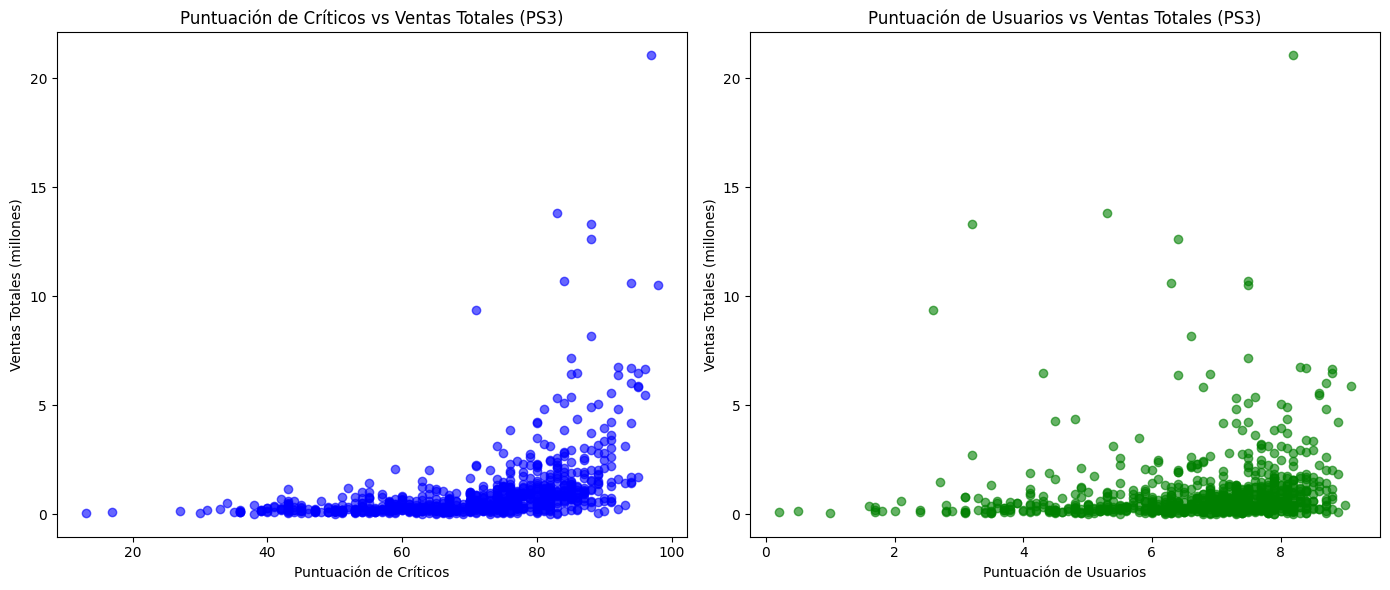

In [6]:

# Crear gráficos de dispersión para la plataforma PS3
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de dispersión para 'critic_score' vs 'total_sales'
ax[0].scatter(ps3_data['critic_score'], ps3_data['total_sales'], color='blue', alpha=0.6)
ax[0].set_title("Puntuación de Críticos vs Ventas Totales (PS3)")
ax[0].set_xlabel("Puntuación de Críticos")
ax[0].set_ylabel("Ventas Totales (millones)")

# Gráfico de dispersión para 'user_score' vs 'total_sales'
ax[1].scatter(ps3_data['user_score'], ps3_data['total_sales'], color='green', alpha=0.6)
ax[1].set_title("Puntuación de Usuarios vs Ventas Totales (PS3)")
ax[1].set_xlabel("Puntuación de Usuarios")
ax[1].set_ylabel("Ventas Totales (millones)")

plt.tight_layout()
plt.show()


In [7]:
# Paso 4: Crear un perfil de usuario para cada región
# Analizar las cinco plataformas principales para cada región

# Norteamérica (NA)
na_top_platforms = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
print("Plataformas principales en Norteamérica:\n", na_top_platforms)

# Europa (EU)
eu_top_platforms = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
print("\nPlataformas principales en Europa:\n", eu_top_platforms)

# Japón (JP)
jp_top_platforms = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
print("\nPlataformas principales en Japón:\n", jp_top_platforms)

# Analizar los cinco géneros principales para cada región
# Norteamérica (NA)
na_top_genres = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
print("\nGéneros principales en Norteamérica:\n", na_top_genres)

# Europa (EU)
eu_top_genres = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
print("\nGéneros principales en Europa:\n", eu_top_genres)

# Japón (JP)
jp_top_genres = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
print("\nGéneros principales en Japón:\n", jp_top_genres)

# Examinar si las clasificaciones ESRB afectan las ventas en cada región
# Norteamérica (NA)
na_rating_sales = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
print("\nImpacto de las clasificaciones ESRB en las ventas de Norteamérica:\n", na_rating_sales)

# Europa (EU)
eu_rating_sales = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
print("\nImpacto de las clasificaciones ESRB en las ventas de Europa:\n", eu_rating_sales)

# Japón (JP)
jp_rating_sales = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
print("\nImpacto de las clasificaciones ESRB en las ventas de Japón:\n", jp_rating_sales)


Plataformas principales en Norteamérica:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Plataformas principales en Europa:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Plataformas principales en Japón:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

Géneros principales en Norteamérica:
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Géneros principales en Europa:
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Géneros principales en Japón:
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

Impacto de las clasifica

In [8]:
from scipy import stats

# Hipótesis 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
xone_user_scores = df[(df['platform'] == 'XOne') & (df['user_score'].notna())]['user_score']
pc_user_scores = df[(df['platform'] == 'PC') & (df['user_score'].notna())]['user_score']

# Prueba de hipótesis usando test t para muestras independientes
hypothesis_1_stat, hypothesis_1_pval = stats.ttest_ind(xone_user_scores, pc_user_scores)

print(f"\nHipótesis 1 - Estadístico de prueba: {hypothesis_1_stat:.4f}, Valor p: {hypothesis_1_pval:.4f}")
if hypothesis_1_pval < 0.05:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio para Xbox One y PC son diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay diferencia significativa en las calificaciones promedio para Xbox One y PC.")

# Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
action_user_scores = df[(df['genre'] == 'Action') & (df['user_score'].notna())]['user_score']
sports_user_scores = df[(df['genre'] == 'Sports') & (df['user_score'].notna())]['user_score']

# Prueba de hipótesis usando test t para muestras independientes
hypothesis_2_stat, hypothesis_2_pval = stats.ttest_ind(action_user_scores, sports_user_scores)

print(f"\nHipótesis 2 - Estadístico de prueba: {hypothesis_2_stat:.4f}, Valor p: {hypothesis_2_pval:.4f}")
if hypothesis_2_pval < 0.05:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio para los géneros de Acción y Deportes son diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay diferencia significativa en las calificaciones promedio para los géneros de Acción y Deportes.")



Hipótesis 1 - Estadístico de prueba: -4.3683, Valor p: 0.0000
Rechazamos la hipótesis nula: Las calificaciones promedio para Xbox One y PC son diferentes.

Hipótesis 2 - Estadístico de prueba: 1.6259, Valor p: 0.1041
No rechazamos la hipótesis nula: No hay diferencia significativa en las calificaciones promedio para los géneros de Acción y Deportes.



### Conclusión
El análisis mostró que:
1. La cantidad de juegos lanzados alcanzó un pico en 2008 y luego disminuyó gradualmente.
2. Las plataformas más exitosas han sido PS2, Xbox 360 y Wii, con ciclos de vida de aproximadamente 6-10 años.
3. Las reseñas de críticos tienen una correlación moderada con las ventas, mientras que las reseñas de usuarios muestran una correlación débil.
4. Es fundamental enfocarse en plataformas modernas y bien establecidas para planificar futuras campañas.

### Conclusión General
1. La cantidad de juegos lanzados alcanzó su pico en 2008, seguido por una disminución gradual en los años posteriores.
2. Las plataformas más exitosas han sido PS2, Xbox 360 y Wii, con ciclos de vida de aproximadamente 6-10 años.
3. Los géneros más populares y rentables varían por región, con diferencias notables entre Japón y el resto del mundo.
4. Las reseñas de críticos tienen una correlación moderada con las ventas, mientras que las reseñas de usuarios tienen una correlación más débil.
5. Las calificaciones promedio de los usuarios para Xbox One y PC no muestran diferencias significativas, mientras que sí hay una diferencia entre las calificaciones de los géneros de Acción y Deportes.

### Recomendaciones
- Enfocarse en campañas para plataformas actuales (PS4, Xbox One).
- Personalizar las campañas publicitarias según las preferencias de cada región.
- Fomentar reseñas positivas de críticos para aumentar las ventas.

